In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO

import matplotlib.pylab as pylab
import warnings
import time
warnings.filterwarnings("ignore")

import scipy.stats as stats






# part 2 implementation and test of a small MLP for inputs of dimension 1. The main goals of part2 have been described in details, spcifically in the last lecture preceding the diffusion of the present text.

## part 2 step1
pick four random numbers
a0 , a1, b1, in the interval [-1 , 1],
a2, b2, in the interval [-1/2 , 1/2],

for any input number x in [0,1] define the function
y= F(x) = a0 + a1 cos(x) + b1 sin(x) + a2 cos(2x) + b2 sin(2x)
plot your function F(x) versus x in [0,1]
the goal is to define and train an MLP dedicated to the approximation of the
function F(x)

In [2]:
# input x

np.random.seed(76)
x = np.random.uniform(0,1)
a0, a1, b1 = np.random.uniform(-1,1,3)
a2, b2 = np.random.uniform(-1/2,1/2,2)

# define function to return y = F(x)
def func_y (a0, a1, x, b1, a2, b2):
    return a0 + a1*np.cos(x) + b1*np.sin(x) + a2*np.cos(2*x) + b2*np.sin(2*x)

In [3]:
xs = sorted(np.random.uniform(0,1,1200))
ys = []
for x in xs:
    y = func_y(a0, a1, x, b1, a2, b2)
    ys.append(y)

Text(0, 0.5, 'y')

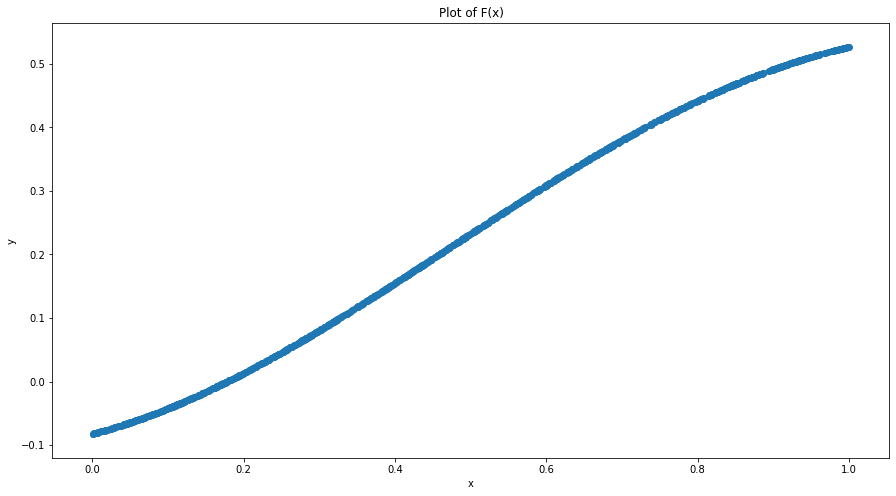

In [4]:
fig, ax = plt.subplots(figsize = (15,8))

ax.scatter(xs, ys)
ax.set_title("Plot of F(x)")
ax.set_xlabel("x")
ax.set_ylabel('y')

## part 2 step2
simulate a training set of N =1000 inputs randomly selected in the interval [0,1]
TRAIN.SET = { x1, x2, , xN }
TRAIN.OUTPUTS = {y1, y2, ..., yN} computed by yj= F(xj)

simulate a test set of 500 inputs randomly selected in the interval [0,1]
TEST.SET = { x_(N+1), , x_(N+500) }
TEST.OUTPUTS = {y_(N+1), ..., y_(N+500} computed by yj= F(xj)
for the next questions the function F(x) be assumed to be unknown

In [5]:
# 1000 train examples
N_train = 1000
np.random.seed(176)
train_set = sorted(np.random.uniform(0,1,N_train))

# test output
train_y = []
for x in train_set:
    y = func_y(a0, a1, x, b1, a2, b2)
    train_y.append(y)

In [6]:
# 500 examples
N_test = 500
np.random.seed(76)
test_set = sorted(np.random.uniform(0,1,N_test))

# test output
test_y = []
for x in test_set:
    y = func_y(a0, a1, x, b1, a2, b2)
    test_y.append(y)

## part 2 step3
define precisely an MLP with 4 layers and 30 neurons as described in last lecture
L1 =input layer of size 1= 1 input neuron denoted X
L2 = layer of size 18 = 2 groups of 9 neurons Z1 Z2 ...Z9 and U1 U2 ...U9
L3 = layer of size 10 = 10 neurons S1...S10
L4 = output layer of size 1 = 1 neuron denoted R
the states of neurons X, Zi, Uj, Sk, R are denoted x, zi, uj, sk, r

all the neurons of layers L2 and L3 are binary neurons taking only the values 0 or 1

any neuron Zi in L2 computes its (binary) state by the response function
g(v) = 1 if v>0 and g(v) = 0 if v< 0
where v = wi1 x + bi and x = state of neuron X

any neuron Uj in L2 computes its (binary) state by the response function g(v)
where v = cj1 x + dj and x = state of neuron X
describe precisely the explicit weights wi1 , cj1 and thresholds bi dj as described in
the last lecture
Explain how layers L2 and L3 should respond to any given input x
Implement a program (in R or in Python ) to compute the states of L2 and the
states of L3 for any given input x
Apply this program to the first 20 values x1 ... x20 in the training set and verify if
the values taken by L2 and L3 correspond to the theoretically expexted values

In [7]:

n_layers = 4
n_neurons = 30

# Layer 1 L1
n_l1 = 1


# Layer 2 L2
L2_z = 9
L2_u = 9


# Layer 3 L3
n_l3 = 10


# Layer 3 L3
n_l3 = 10


# Layer 4 L4
n_l4 = 1

In [8]:
np.random.seed(76)
# Z's
wi = np.ones(9).reshape(1,-1)
bi = np.array(np.arange(-1/10, -1, -1/10)).reshape(1,-1)

# U's
cj = -1 * np.ones(9).reshape(1,-1)
dj = -1 * np.array(np.arange(-1/10, -1, -1/10)).reshape(1,-1)

In [9]:
def binary(v):
    return np.where(v>0, 1, 0)

## Layer 3

In [10]:
# m is a vector that will be learned
def out_l4(m):
    return m.reshape(1, -1).dot(S.reshape(-1,1))

Describe precisely how layers L2 and L3 should respond to any given input x in a
given interval such as 3/10 ≤ x <4/10 or such as 6/10 ≤ x <7/10
Denote X1, X2, X3 the three vectors gathering respectively the states of the
neurons in layers L1 L2 L3 . Implement a program to compute successively the
vectors X2 , X3 for any given input X1=x.
As explained in class, do not try to do this by using tensorflow, but use matrix
multiplications and matrix sums to express X2 in terms of X1, and X3 in terms of
X2. As indicated in today's lecture these formulas have a simple form provided
one defines the vector g(V) for any vector V as the vector with coordinates g(V1) ,
g(V2), g(V3) ...where V1 V2.V3.. are the coordinates of V

Apply this program to the first 20 values x1 ... x20 in the training set and verify if
the values taken by L2 and L3 correspond to the theoretically expected values

In [11]:
def compute_x2(x, wi, bi, cj, dj):
    # out of layer 2 for Z's
    out_l2_z = binary(np.array(x).reshape(1,-1).dot(wi)+bi)
    out_l2_u = binary(np.array(x).reshape(1,-1).dot(cj) + dj)
    
    return out_l2_z, out_l2_u

In [12]:
def compute_Sk(pkk_1, zk_1, hkk, uk, tk):
    return pkk_1*zk_1 + hkk*uk + tk 


h11 = 1
t1 = -1/2


p10_9 = 1
t10 = -1/2


pkk_1 = 1
hkk = 1
tk = -3/2

def compute_x3(x, h11, t1, n_l3, out_l2_u, out_l2_z, pkk_1, hkk, tk, p10_9, t10):
    # S = neurons in layer 3
    S = np.zeros(shape=(n_l3, 1))
    S[0] = binary(h11*out_l2_u[0][0]+t1)


    for k in range(1,9,1):
        S[k] = binary(compute_Sk(pkk_1, out_l2_z[0][k-1], hkk, out_l2_u[0][k], tk))


    p10_9 = 1
    t10 = -1/2
    S[9] = binary(p10_9*out_l2_z[0][8] + t10)
    
    return S

## For input x in a given interval 3/10 < x < 4/10, given the 

## Step 4

In [13]:
# To learn m's
K = []


for j in range(n_l3):
    s = np.zeros(shape=(n_l3, 1))
    k = []
    for x in test_set:
        z, u = compute_x2(x, wi, bi, cj, dj)
        s = compute_x3(x, h11, t1, n_l3, u, z, pkk_1, hkk, tk, p10_9, t10)
        if (s[j] > 0):
            k.append(x)
    
    K.append(k)



In [14]:
ms = []
for k in K:
    if (len(k) > 0):
        ms.append(np.mean(k))
    else:
        ms.append(0)

In [15]:
def compute_x4(ms, s):
    return np.array(ms).reshape(1,-1).dot(np.array(s).reshape(-1,1))

In [16]:
G = []
X = [x/100 for x in range(0, 101, 1)]
for x in X:
    z, u = compute_x2(x, wi, bi, cj, dj)
    s = compute_x3(x, h11, t1, n_l3, u, z, pkk_1, hkk, tk, p10_9, t10)
    gx = compute_x4(ms, s)
    
    G.append(gx)

Text(0, 0.5, 'Y')

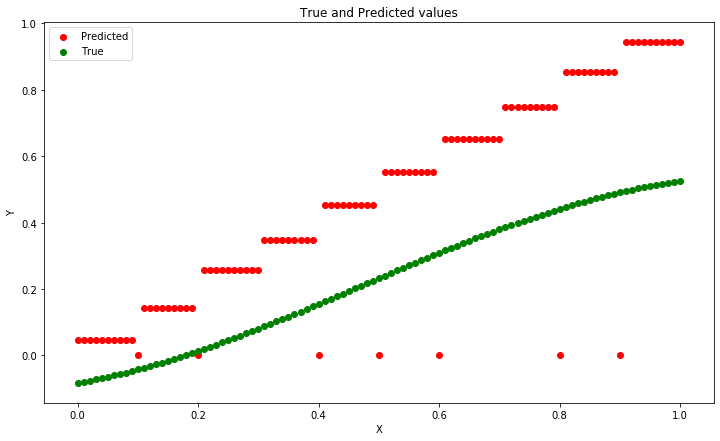

In [30]:

F = []

for x in X:
    F.append(func_y(a0, a1, x, b1, a2, b2))


fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(X, y = G, c = 'r', label = 'Predicted')

ax.scatter(X, y= F, c = 'g', label = 'True')
ax.legend()

ax.set_title('True and Predicted values')
ax.set_xlabel('X')
ax.set_ylabel('Y')

## Step 7

In [31]:
preds_train = []

for x in train_set:
    z, u = compute_x2(x, wi, bi, cj, dj)
    s = compute_x3(x, h11, t1, n_l3, u, z, pkk_1, hkk, tk, p10_9, t10)
    gx = compute_x4(ms, s)
    
    gx = gx[0][0]
    preds_train.append(gx)
    
    
MAE_train = np.sum(abs(np.array(preds_train) - np.array(train_y)))/N_train
MSE_train = (np.sum( (np.array(preds_train) - np.array(train_y))**2))/N_train

In [32]:
preds_test = []

for x in test_set:
    z, u = compute_x2(x, wi, bi, cj, dj)
    s = compute_x3(x, h11, t1, n_l3, u, z, pkk_1, hkk, tk, p10_9, t10)
    gx = compute_x4(ms, s)
    
    gx = gx[0][0]
    preds_test.append(gx)
    
    
MAE_test = np.sum(abs(np.array(preds_test) - np.array(test_y)))/N_test
MSE_test = (np.sum( (np.array(preds_test) - np.array(test_y))**2))/N_test

In [33]:
print ('MSE train =',MSE_train)

MSE train = 0.08517191170313654


In [34]:
print ('MSE test =',MSE_test)

MSE test = 0.08080457043892923
